In [1]:
import math
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch import Tensor
from torch.optim import SGD
from torch.utils.data import Dataset, random_split
from torch.nn import Linear, ReLU, Sigmoid, Module, BCELoss
from torch.nn.init import kaiming_uniform_, xavier_uniform_
from sklearn.model_selection import train_test_split
import time
import os
from torchvision import transforms
from collections import OrderedDict
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.initializers import RandomNormal
from keras.layers import Dense, Activation, Dropout, Input
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import keras
import random

In [2]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6



In [3]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
random.seed(42)

In [5]:
inputdata = pd.read_csv(r'D:\train0.csv')
#inputdatai_np = inputdata.to_numpy()
#inputdatai_np

In [6]:
inputdata = inputdata.sample(frac=1)

In [7]:
print(inputdata.isnull().any())

row_id           False
time_id          False
investment_id    False
target           False
f_0              False
                 ...  
f_295            False
f_296            False
f_297            False
f_298            False
f_299            False
Length: 304, dtype: bool


In [8]:
X_train = inputdata.drop(["row_id","time_id","investment_id","target"],axis =1)
Y_train = pd.DataFrame(inputdata["target"])

In [9]:
X_val = X_train[X_train.shape[0]//10*7:]
X_train = X_train[:X_train.shape[0]//10*7]
Y_val = Y_train[Y_train.shape[0]//10*7:]
Y_train = Y_train[:Y_train.shape[0]//10*7]

In [10]:
X_val = np.array(X_val)
X_train = np.array(X_train)
Y_val = np.array(Y_val)
Y_train = np.array(Y_train)

In [11]:
hiddend = [600,300,100,30]
inputd = 300
outputd = 1
batchsize = 1000
num_epochs = 100
# use Adam
lr = 0.001

model = Sequential()
model.add(Input(shape=(inputd,)))

model.add(Dense(hiddend[0], activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(hiddend[1], activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(hiddend[2], activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(hiddend[3], activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(outputd, activation = "linear"))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mean_squared_error'])
history = model.fit(X_train, Y_train, batch_size = batchsize, epochs = num_epochs, verbose = 1, validation_data=(X_val,Y_val))

Epoch 1/100
220/220 [==============================] - 5s 14ms/step - loss: 2.0939 - mean_squared_error: 2.0939 - val_loss: 0.8799 - val_mean_squared_error: 0.8799
Epoch 2/100
220/220 [==============================] - 3s 14ms/step - loss: 1.1140 - mean_squared_error: 1.1140 - val_loss: 0.8709 - val_mean_squared_error: 0.8709
Epoch 3/100
220/220 [==============================] - 3s 14ms/step - loss: 0.9374 - mean_squared_error: 0.9374 - val_loss: 0.8710 - val_mean_squared_error: 0.8710
Epoch 4/100
220/220 [==============================] - 3s 13ms/step - loss: 0.8934 - mean_squared_error: 0.8934 - val_loss: 0.8709 - val_mean_squared_error: 0.8709
Epoch 5/100
220/220 [==============================] - 3s 13ms/step - loss: 0.8818 - mean_squared_error: 0.8818 - val_loss: 0.8712 - val_mean_squared_error: 0.8712
Epoch 6/100
220/220 [==============================] - 3s 14ms/step - loss: 0.8791 - mean_squared_error: 0.8791 - val_loss: 0.8691 - val_mean_squared_error: 0.8691
Epoch 7/100
220/

Epoch 51/100
220/220 [==============================] - 3s 13ms/step - loss: 0.7754 - mean_squared_error: 0.7754 - val_loss: 0.8518 - val_mean_squared_error: 0.8518
Epoch 52/100
220/220 [==============================] - 3s 13ms/step - loss: 0.7695 - mean_squared_error: 0.7695 - val_loss: 0.8551 - val_mean_squared_error: 0.8551
Epoch 53/100
220/220 [==============================] - 3s 13ms/step - loss: 0.7697 - mean_squared_error: 0.7697 - val_loss: 0.8545 - val_mean_squared_error: 0.8545
Epoch 54/100
220/220 [==============================] - 3s 13ms/step - loss: 0.7661 - mean_squared_error: 0.7661 - val_loss: 0.8484 - val_mean_squared_error: 0.8484
Epoch 55/100
220/220 [==============================] - 3s 13ms/step - loss: 0.7614 - mean_squared_error: 0.7614 - val_loss: 0.8505 - val_mean_squared_error: 0.8505
Epoch 56/100
220/220 [==============================] - 3s 13ms/step - loss: 0.7560 - mean_squared_error: 0.7560 - val_loss: 0.8521 - val_mean_squared_error: 0.8521
Epoch 57/1

220/220 [==============================] - 3s 13ms/step - loss: 0.6669 - mean_squared_error: 0.6669 - val_loss: 0.8570 - val_mean_squared_error: 0.8570


### Plot the result

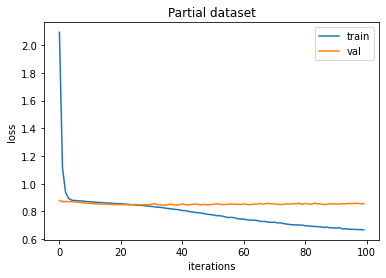

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.title("Partial dataset")
plt.show()

In [13]:
inputdata_all = pd.read_csv(r'D:\train.csv')
inputdata_all = inputdata_all.sample(frac=1)
print(inputdata.isnull().any())

row_id           False
time_id          False
investment_id    False
target           False
f_0              False
                 ...  
f_295            False
f_296            False
f_297            False
f_298            False
f_299            False
Length: 304, dtype: bool


In [14]:
X_train_all = inputdata_all.drop(["row_id","time_id","investment_id","target"],axis =1)
Y_train_all = pd.DataFrame(inputdata_all["target"])

In [15]:
X_val_all = X_train_all[X_train_all.shape[0]//10*7:]
X_train_all = X_train_all[:X_train_all.shape[0]//10*7]
Y_val_all = Y_train_all[Y_train_all.shape[0]//10*7:]
Y_train_all = Y_train_all[:Y_train_all.shape[0]//10*7]
X_val_all = np.array(X_val_all)
X_train_all = np.array(X_train_all)
Y_val_all = np.array(Y_val_all)
Y_train_all = np.array(Y_train_all)
batchsize_all = 2000
num_epochs_all = 100

model3 = Sequential()
model3.add(Input(shape=(inputd,)))

model3.add(Dense(hiddend[0], activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(hiddend[1], activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(hiddend[2], activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(hiddend[3], activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(outputd, activation = "linear"))

model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mean_squared_error'])

history_all = model3.fit(X_train_all, Y_train_all, batch_size = batchsize_all, epochs = num_epochs_all, verbose = 1, validation_data=(X_val_all,Y_val_all))

Epoch 1/100
1100/1100 [==============================] - 14s 12ms/step - loss: 1.1562 - mean_squared_error: 1.1562 - val_loss: 0.8363 - val_mean_squared_error: 0.8363
Epoch 2/100
1100/1100 [==============================] - 13s 11ms/step - loss: 0.8396 - mean_squared_error: 0.8396 - val_loss: 0.8307 - val_mean_squared_error: 0.8307
Epoch 3/100
1100/1100 [==============================] - 13s 11ms/step - loss: 0.8354 - mean_squared_error: 0.8354 - val_loss: 0.8266 - val_mean_squared_error: 0.8266
Epoch 4/100
1100/1100 [==============================] - 13s 12ms/step - loss: 0.8324 - mean_squared_error: 0.8324 - val_loss: 0.8251 - val_mean_squared_error: 0.8251
Epoch 5/100
1100/1100 [==============================] - 13s 11ms/step - loss: 0.8306 - mean_squared_error: 0.8306 - val_loss: 0.8243 - val_mean_squared_error: 0.8243
Epoch 6/100
1100/1100 [==============================] - 13s 11ms/step - loss: 0.8295 - mean_squared_error: 0.8295 - val_loss: 0.8225 - val_mean_squared_error: 0.822

Epoch 50/100
1100/1100 [==============================] - 13s 12ms/step - loss: 0.7951 - mean_squared_error: 0.7951 - val_loss: 0.8150 - val_mean_squared_error: 0.8150
Epoch 51/100
1100/1100 [==============================] - 14s 13ms/step - loss: 0.7942 - mean_squared_error: 0.7942 - val_loss: 0.8143 - val_mean_squared_error: 0.8143
Epoch 52/100
1100/1100 [==============================] - 14s 13ms/step - loss: 0.7936 - mean_squared_error: 0.7936 - val_loss: 0.8144 - val_mean_squared_error: 0.8144
Epoch 53/100
1100/1100 [==============================] - 14s 12ms/step - loss: 0.7929 - mean_squared_error: 0.7929 - val_loss: 0.8147 - val_mean_squared_error: 0.8147
Epoch 54/100
1100/1100 [==============================] - 14s 12ms/step - loss: 0.7926 - mean_squared_error: 0.7926 - val_loss: 0.8147 - val_mean_squared_error: 0.8147
Epoch 55/100
1100/1100 [==============================] - 13s 12ms/step - loss: 0.7919 - mean_squared_error: 0.7919 - val_loss: 0.8159 - val_mean_squared_error:

Epoch 99/100
1100/1100 [==============================] - 13s 11ms/step - loss: 0.7750 - mean_squared_error: 0.7750 - val_loss: 0.8165 - val_mean_squared_error: 0.8165
Epoch 100/100
1100/1100 [==============================] - 13s 11ms/step - loss: 0.7744 - mean_squared_error: 0.7744 - val_loss: 0.8158 - val_mean_squared_error: 0.8158


### Plot the result. 

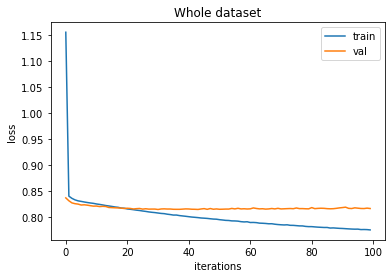

In [31]:
plt.plot(history_all.history['loss'])
plt.plot(history_all.history['val_loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.title("Whole dataset")
plt.show()

### Remove outliers

In [17]:
X_train_pd = pd.DataFrame(X_train)
Y_train_pd = pd.DataFrame(Y_train)
# We can show the quantile of the data and remove top 1%o and bot 1%o
X_train_pd_high = X_train_pd.quantile(0.999) 
X_train_pd_low = X_train_pd.quantile(0.001)


In [18]:
X_train_pd.insert(1,300, 0)
X_train_pd[300] = Y_train_pd[0]
for i in range (300):
    print("now running: ", i)
    X_train_pd = X_train_pd[X_train_pd[i] >= X_train_pd_low[i]]
    X_train_pd = X_train_pd[X_train_pd[i] <= X_train_pd_high[i]]
Y_train_pd = pd.DataFrame(X_train_pd[300])
X_train_pd = X_train_pd.drop([300], axis=1)


now running:  0
now running:  1
now running:  2
now running:  3
now running:  4
now running:  5
now running:  6
now running:  7
now running:  8
now running:  9
now running:  10
now running:  11
now running:  12
now running:  13
now running:  14
now running:  15
now running:  16
now running:  17
now running:  18
now running:  19
now running:  20
now running:  21
now running:  22
now running:  23
now running:  24
now running:  25
now running:  26
now running:  27
now running:  28
now running:  29
now running:  30
now running:  31
now running:  32
now running:  33
now running:  34
now running:  35
now running:  36
now running:  37
now running:  38
now running:  39
now running:  40
now running:  41
now running:  42
now running:  43
now running:  44
now running:  45
now running:  46
now running:  47
now running:  48
now running:  49
now running:  50
now running:  51
now running:  52
now running:  53
now running:  54
now running:  55
now running:  56
now running:  57
now running:  58
now run

In [32]:
X_train2 = np.array(X_train_pd)
Y_train2 = np.array(Y_train_pd)
model4 = Sequential()
model4.add(Input(shape=(inputd,)))

model4.add(Dense(hiddend[0], activation = "relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(hiddend[1], activation = "relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(hiddend[2], activation = "relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(hiddend[3], activation = "relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(outputd, activation = "linear"))

model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mean_squared_error'])
history2 = model4.fit(X_train2, Y_train2, batch_size = batchsize_all, epochs = num_epochs_all, verbose = 1, validation_data=(X_val,Y_val))

Epoch 1/100
82/82 [==============================] - 2s 19ms/step - loss: 3.0313 - mean_squared_error: 3.0313 - val_loss: 0.9139 - val_mean_squared_error: 0.9139
Epoch 2/100
82/82 [==============================] - 1s 11ms/step - loss: 1.8035 - mean_squared_error: 1.8035 - val_loss: 0.8852 - val_mean_squared_error: 0.8852
Epoch 3/100
82/82 [==============================] - 1s 12ms/step - loss: 1.3627 - mean_squared_error: 1.3627 - val_loss: 0.8815 - val_mean_squared_error: 0.8815
Epoch 4/100
82/82 [==============================] - 1s 12ms/step - loss: 1.1151 - mean_squared_error: 1.1151 - val_loss: 0.8742 - val_mean_squared_error: 0.8742
Epoch 5/100
82/82 [==============================] - 1s 12ms/step - loss: 0.9695 - mean_squared_error: 0.9695 - val_loss: 0.8721 - val_mean_squared_error: 0.8721
Epoch 6/100
82/82 [==============================] - 1s 12ms/step - loss: 0.8860 - mean_squared_error: 0.8860 - val_loss: 0.8708 - val_mean_squared_error: 0.8708
Epoch 7/100
82/82 [=========

82/82 [==============================] - 1s 13ms/step - loss: 0.7304 - mean_squared_error: 0.7304 - val_loss: 0.8538 - val_mean_squared_error: 0.8538
Epoch 52/100
82/82 [==============================] - 1s 13ms/step - loss: 0.7288 - mean_squared_error: 0.7288 - val_loss: 0.8611 - val_mean_squared_error: 0.8611
Epoch 53/100
82/82 [==============================] - 1s 13ms/step - loss: 0.7267 - mean_squared_error: 0.7267 - val_loss: 0.8532 - val_mean_squared_error: 0.8532
Epoch 54/100
82/82 [==============================] - 1s 13ms/step - loss: 0.7235 - mean_squared_error: 0.7235 - val_loss: 0.8617 - val_mean_squared_error: 0.8617
Epoch 55/100
82/82 [==============================] - 1s 13ms/step - loss: 0.7222 - mean_squared_error: 0.7222 - val_loss: 0.8544 - val_mean_squared_error: 0.8544
Epoch 56/100
82/82 [==============================] - 1s 13ms/step - loss: 0.7202 - mean_squared_error: 0.7202 - val_loss: 0.8608 - val_mean_squared_error: 0.8608
Epoch 57/100
82/82 [===============

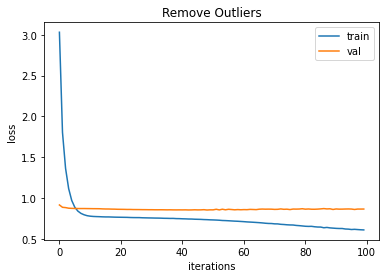

In [33]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.title("Remove Outliers")
plt.show()

### Remove a layer?

In [21]:
model2 = Sequential()
model2.add(Input(shape=(inputd,)))

model2.add(Dense(hiddend[1], activation = "relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(hiddend[2], activation = "relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(hiddend[3], activation = "relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(outputd, activation = "linear"))

model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mean_squared_error'])
history3 = model2.fit(X_train, Y_train, batch_size = batchsize, epochs = num_epochs, verbose = 1, validation_data=(X_val,Y_val))

Epoch 1/100
220/220 [==============================] - 4s 12ms/step - loss: 2.0129 - mean_squared_error: 2.0129 - val_loss: 0.8808 - val_mean_squared_error: 0.8808
Epoch 2/100
220/220 [==============================] - 2s 11ms/step - loss: 1.0894 - mean_squared_error: 1.0894 - val_loss: 0.8686 - val_mean_squared_error: 0.8686
Epoch 3/100
220/220 [==============================] - 2s 11ms/step - loss: 0.9312 - mean_squared_error: 0.9312 - val_loss: 0.8680 - val_mean_squared_error: 0.8680
Epoch 4/100
220/220 [==============================] - 2s 10ms/step - loss: 0.8901 - mean_squared_error: 0.8901 - val_loss: 0.8682 - val_mean_squared_error: 0.8682
Epoch 5/100
220/220 [==============================] - 2s 10ms/step - loss: 0.8803 - mean_squared_error: 0.8803 - val_loss: 0.8676 - val_mean_squared_error: 0.8676
Epoch 6/100
220/220 [==============================] - 2s 11ms/step - loss: 0.8776 - mean_squared_error: 0.8776 - val_loss: 0.8667 - val_mean_squared_error: 0.8667
Epoch 7/100
220/

Epoch 51/100
220/220 [==============================] - 2s 11ms/step - loss: 0.8000 - mean_squared_error: 0.8000 - val_loss: 0.8521 - val_mean_squared_error: 0.8521
Epoch 52/100
220/220 [==============================] - 2s 11ms/step - loss: 0.7991 - mean_squared_error: 0.7991 - val_loss: 0.8566 - val_mean_squared_error: 0.8566
Epoch 53/100
220/220 [==============================] - 2s 10ms/step - loss: 0.7984 - mean_squared_error: 0.7984 - val_loss: 0.8514 - val_mean_squared_error: 0.8514
Epoch 54/100
220/220 [==============================] - 2s 11ms/step - loss: 0.7937 - mean_squared_error: 0.7937 - val_loss: 0.8534 - val_mean_squared_error: 0.8534
Epoch 55/100
220/220 [==============================] - 2s 10ms/step - loss: 0.7924 - mean_squared_error: 0.7924 - val_loss: 0.8541 - val_mean_squared_error: 0.8541
Epoch 56/100
220/220 [==============================] - 2s 11ms/step - loss: 0.7893 - mean_squared_error: 0.7893 - val_loss: 0.8512 - val_mean_squared_error: 0.8512
Epoch 57/1

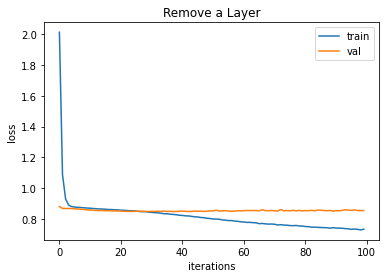

In [26]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.title("Remove a Layer")
plt.show()

### No normolization?

In [23]:
model5 = Sequential()
model5.add(Input(shape=(inputd,)))

model5.add(Dense(hiddend[1], activation = "relu"))
model5.add(Dropout(0.5))

model5.add(Dense(hiddend[2], activation = "relu"))
model5.add(Dropout(0.5))

model5.add(Dense(hiddend[3], activation = "relu"))
model5.add(Dropout(0.5))

model5.add(Dense(outputd, activation = "linear"))

model5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mean_squared_error'])
history4 = model5.fit(X_train, Y_train, batch_size = batchsize, epochs = num_epochs, verbose = 1, validation_data=(X_val,Y_val))

Epoch 1/100
220/220 [==============================] - 2s 6ms/step - loss: 1.0395 - mean_squared_error: 1.0395 - val_loss: 0.8739 - val_mean_squared_error: 0.8739
Epoch 2/100
220/220 [==============================] - 1s 6ms/step - loss: 0.8868 - mean_squared_error: 0.8868 - val_loss: 0.8741 - val_mean_squared_error: 0.8741
Epoch 3/100
220/220 [==============================] - 1s 5ms/step - loss: 0.8831 - mean_squared_error: 0.8831 - val_loss: 0.8735 - val_mean_squared_error: 0.8735
Epoch 4/100
220/220 [==============================] - 1s 5ms/step - loss: 0.8817 - mean_squared_error: 0.8817 - val_loss: 0.8718 - val_mean_squared_error: 0.8718
Epoch 5/100
220/220 [==============================] - 1s 5ms/step - loss: 0.8802 - mean_squared_error: 0.8802 - val_loss: 0.8708 - val_mean_squared_error: 0.8708
Epoch 6/100
220/220 [==============================] - 1s 5ms/step - loss: 0.8787 - mean_squared_error: 0.8787 - val_loss: 0.8687 - val_mean_squared_error: 0.8687
Epoch 7/100
220/220 [=

220/220 [==============================] - 1s 5ms/step - loss: 0.8018 - mean_squared_error: 0.8018 - val_loss: 0.8502 - val_mean_squared_error: 0.8502
Epoch 52/100
220/220 [==============================] - 1s 5ms/step - loss: 0.8019 - mean_squared_error: 0.8019 - val_loss: 0.8497 - val_mean_squared_error: 0.8497
Epoch 53/100
220/220 [==============================] - 1s 5ms/step - loss: 0.7965 - mean_squared_error: 0.7965 - val_loss: 0.8504 - val_mean_squared_error: 0.8504
Epoch 54/100
220/220 [==============================] - 1s 5ms/step - loss: 0.7958 - mean_squared_error: 0.7958 - val_loss: 0.8491 - val_mean_squared_error: 0.8491
Epoch 55/100
220/220 [==============================] - 1s 5ms/step - loss: 0.7946 - mean_squared_error: 0.7946 - val_loss: 0.8494 - val_mean_squared_error: 0.8494
Epoch 56/100
220/220 [==============================] - 1s 5ms/step - loss: 0.7929 - mean_squared_error: 0.7929 - val_loss: 0.8508 - val_mean_squared_error: 0.8508
Epoch 57/100
220/220 [=======

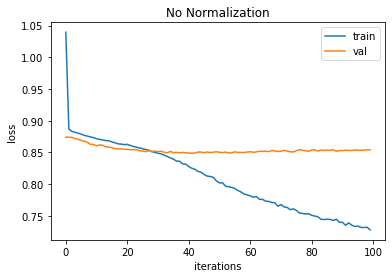

In [27]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.title("No Normalization")
plt.show()

### Other Activation Function?

In [34]:
model6 = Sequential()
model6.add(Input(shape=(inputd,)))

model6.add(Dense(hiddend[0], activation = "sigmoid"))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(hiddend[1], activation = "sigmoid"))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(hiddend[2], activation = "sigmoid"))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(hiddend[3], activation = "sigmoid"))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

model6.add(Dense(outputd, activation = "linear"))

model6.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mean_squared_error'])
history5 = model6.fit(X_train, Y_train, batch_size = batchsize, epochs = num_epochs, verbose = 1, validation_data=(X_val,Y_val))

Epoch 1/100
220/220 [==============================] - 4s 15ms/step - loss: 2.1459 - mean_squared_error: 2.1459 - val_loss: 0.8856 - val_mean_squared_error: 0.8856
Epoch 2/100
220/220 [==============================] - 3s 12ms/step - loss: 1.1496 - mean_squared_error: 1.1496 - val_loss: 0.8690 - val_mean_squared_error: 0.8690
Epoch 3/100
220/220 [==============================] - 3s 12ms/step - loss: 0.9457 - mean_squared_error: 0.9457 - val_loss: 0.8675 - val_mean_squared_error: 0.8675
Epoch 4/100
220/220 [==============================] - 3s 13ms/step - loss: 0.8930 - mean_squared_error: 0.8930 - val_loss: 0.8658 - val_mean_squared_error: 0.8658
Epoch 5/100
220/220 [==============================] - 3s 14ms/step - loss: 0.8782 - mean_squared_error: 0.8782 - val_loss: 0.8632 - val_mean_squared_error: 0.8632
Epoch 6/100
220/220 [==============================] - 3s 12ms/step - loss: 0.8742 - mean_squared_error: 0.8742 - val_loss: 0.8616 - val_mean_squared_error: 0.8616
Epoch 7/100
220/

Epoch 51/100
220/220 [==============================] - 3s 13ms/step - loss: 0.8424 - mean_squared_error: 0.8424 - val_loss: 0.8504 - val_mean_squared_error: 0.8504
Epoch 52/100
220/220 [==============================] - 3s 14ms/step - loss: 0.8421 - mean_squared_error: 0.8421 - val_loss: 0.8515 - val_mean_squared_error: 0.8515
Epoch 53/100
220/220 [==============================] - 3s 12ms/step - loss: 0.8400 - mean_squared_error: 0.8400 - val_loss: 0.8518 - val_mean_squared_error: 0.8518
Epoch 54/100
220/220 [==============================] - 2s 11ms/step - loss: 0.8392 - mean_squared_error: 0.8392 - val_loss: 0.8510 - val_mean_squared_error: 0.8510
Epoch 55/100
220/220 [==============================] - 2s 11ms/step - loss: 0.8370 - mean_squared_error: 0.8370 - val_loss: 0.8547 - val_mean_squared_error: 0.8547
Epoch 56/100
220/220 [==============================] - 3s 12ms/step - loss: 0.8366 - mean_squared_error: 0.8366 - val_loss: 0.8510 - val_mean_squared_error: 0.8510
Epoch 57/1

220/220 [==============================] - 3s 14ms/step - loss: 0.7720 - mean_squared_error: 0.7720 - val_loss: 0.8595 - val_mean_squared_error: 0.8595


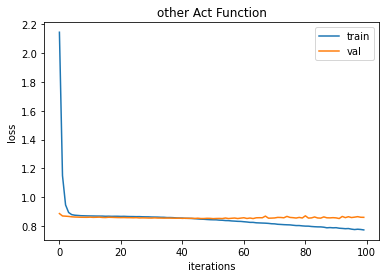

In [36]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.title("other Act Function")
plt.show()

### Normalize the dataset first?

In [37]:
model7 = Sequential()
model7.add(Input(shape=(inputd,)))
model7.add(BatchNormalization())

model7.add(Dense(hiddend[0], activation = "relu"))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(hiddend[1], activation = "relu"))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(hiddend[2], activation = "relu"))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(hiddend[3], activation = "relu"))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(outputd, activation = "linear"))

model7.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mean_squared_error'])
history6 = model7.fit(X_train, Y_train, batch_size = batchsize_all, epochs = num_epochs_all, verbose = 1, validation_data=(X_val,Y_val))

Epoch 1/100
110/110 [==============================] - 3s 21ms/step - loss: 2.5577 - mean_squared_error: 2.5577 - val_loss: 0.8818 - val_mean_squared_error: 0.8818
Epoch 2/100
110/110 [==============================] - 1s 12ms/step - loss: 1.5489 - mean_squared_error: 1.5489 - val_loss: 0.8742 - val_mean_squared_error: 0.8742
Epoch 3/100
110/110 [==============================] - 1s 12ms/step - loss: 1.2105 - mean_squared_error: 1.2105 - val_loss: 0.8712 - val_mean_squared_error: 0.8712
Epoch 4/100
110/110 [==============================] - 1s 12ms/step - loss: 1.0421 - mean_squared_error: 1.0421 - val_loss: 0.8707 - val_mean_squared_error: 0.8707
Epoch 5/100
110/110 [==============================] - 1s 13ms/step - loss: 0.9609 - mean_squared_error: 0.9609 - val_loss: 0.8702 - val_mean_squared_error: 0.8702
Epoch 6/100
110/110 [==============================] - 1s 13ms/step - loss: 0.9208 - mean_squared_error: 0.9208 - val_loss: 0.8702 - val_mean_squared_error: 0.8702
Epoch 7/100
110/

Epoch 51/100
110/110 [==============================] - 1s 13ms/step - loss: 0.8055 - mean_squared_error: 0.8055 - val_loss: 0.8514 - val_mean_squared_error: 0.8514
Epoch 52/100
110/110 [==============================] - 1s 13ms/step - loss: 0.8010 - mean_squared_error: 0.8010 - val_loss: 0.8492 - val_mean_squared_error: 0.8492
Epoch 53/100
110/110 [==============================] - 1s 12ms/step - loss: 0.7994 - mean_squared_error: 0.7994 - val_loss: 0.8499 - val_mean_squared_error: 0.8499
Epoch 54/100
110/110 [==============================] - 1s 12ms/step - loss: 0.7925 - mean_squared_error: 0.7925 - val_loss: 0.8475 - val_mean_squared_error: 0.8475
Epoch 55/100
110/110 [==============================] - 1s 13ms/step - loss: 0.7874 - mean_squared_error: 0.7874 - val_loss: 0.8532 - val_mean_squared_error: 0.8532
Epoch 56/100
110/110 [==============================] - 1s 13ms/step - loss: 0.7854 - mean_squared_error: 0.7854 - val_loss: 0.8543 - val_mean_squared_error: 0.8543
Epoch 57/1

110/110 [==============================] - 1s 13ms/step - loss: 0.6487 - mean_squared_error: 0.6487 - val_loss: 0.8600 - val_mean_squared_error: 0.8600


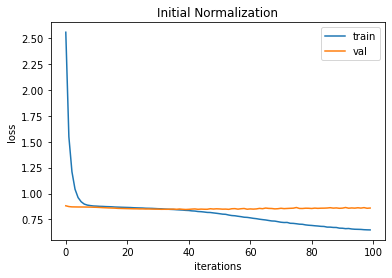

In [40]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.title("Initial Normalization")
plt.show()

### Other optimizer?

In [39]:
model8 = Sequential()
model8.add(Input(shape=(inputd,)))

model8.add(Dense(hiddend[0], activation = "relu"))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(hiddend[1], activation = "relu"))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(hiddend[2], activation = "relu"))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(hiddend[3], activation = "relu"))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

model8.add(Dense(outputd, activation = "linear"))

model8.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mean_squared_error'])
history7 = model8.fit(X_train, Y_train, batch_size = batchsize_all, epochs = num_epochs_all, verbose = 1, validation_data=(X_val,Y_val))

Epoch 1/100
110/110 [==============================] - 2s 14ms/step - loss: 1.3427 - mean_squared_error: 1.3427 - val_loss: 0.8739 - val_mean_squared_error: 0.8739
Epoch 2/100
110/110 [==============================] - 1s 11ms/step - loss: 0.8822 - mean_squared_error: 0.8822 - val_loss: 0.8742 - val_mean_squared_error: 0.8742
Epoch 3/100
110/110 [==============================] - 1s 12ms/step - loss: 0.8817 - mean_squared_error: 0.8817 - val_loss: 0.8740 - val_mean_squared_error: 0.8740
Epoch 4/100
110/110 [==============================] - 1s 12ms/step - loss: 0.8816 - mean_squared_error: 0.8816 - val_loss: 0.8741 - val_mean_squared_error: 0.8741
Epoch 5/100
110/110 [==============================] - 1s 12ms/step - loss: 0.8814 - mean_squared_error: 0.8814 - val_loss: 0.8740 - val_mean_squared_error: 0.8740
Epoch 6/100
110/110 [==============================] - 1s 12ms/step - loss: 0.8814 - mean_squared_error: 0.8814 - val_loss: 0.8740 - val_mean_squared_error: 0.8740
Epoch 7/100
110/

Epoch 51/100
110/110 [==============================] - 1s 12ms/step - loss: 0.8807 - mean_squared_error: 0.8807 - val_loss: 0.8732 - val_mean_squared_error: 0.8732
Epoch 52/100
110/110 [==============================] - 1s 12ms/step - loss: 0.8806 - mean_squared_error: 0.8806 - val_loss: 0.8735 - val_mean_squared_error: 0.8735
Epoch 53/100
110/110 [==============================] - 1s 12ms/step - loss: 0.8808 - mean_squared_error: 0.8808 - val_loss: 0.8734 - val_mean_squared_error: 0.8734
Epoch 54/100
110/110 [==============================] - 1s 12ms/step - loss: 0.8810 - mean_squared_error: 0.8810 - val_loss: 0.8735 - val_mean_squared_error: 0.8735
Epoch 55/100
110/110 [==============================] - 1s 12ms/step - loss: 0.8806 - mean_squared_error: 0.8806 - val_loss: 0.8734 - val_mean_squared_error: 0.8734
Epoch 56/100
110/110 [==============================] - 1s 12ms/step - loss: 0.8808 - mean_squared_error: 0.8808 - val_loss: 0.8732 - val_mean_squared_error: 0.8732
Epoch 57/1

110/110 [==============================] - 1s 12ms/step - loss: 0.8794 - mean_squared_error: 0.8794 - val_loss: 0.8719 - val_mean_squared_error: 0.8719


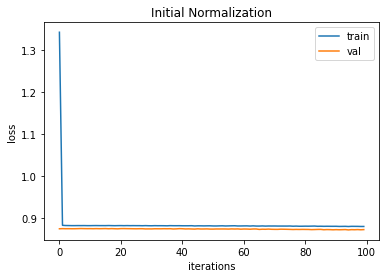

In [41]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.title("Initial Normalization")
plt.show()

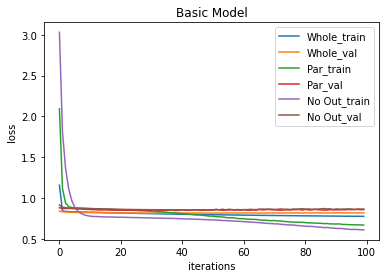

In [42]:
plt.plot(history_all.history['loss'])
plt.plot(history_all.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["Whole_train", "Whole_val","Par_train", "Par_val","No Out_train", "No Out_val"])
plt.title("Basic Model")
plt.show()

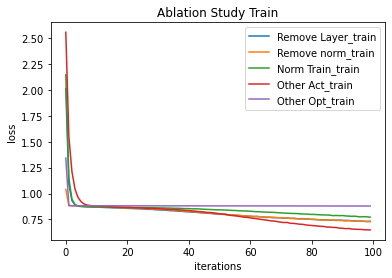

In [47]:
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])
plt.plot(history5.history['loss'])
plt.plot(history6.history['loss'])
plt.plot(history7.history['loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["Remove Layer_train", "Remove norm_train", "Norm Train_train", "Other Act_train" , "Other Opt_train"])
plt.title("Ablation Study Train")
plt.show()

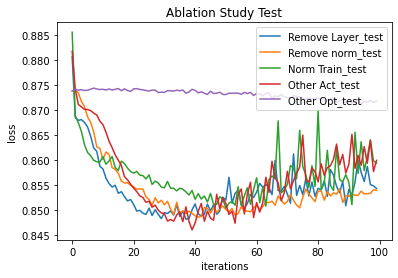

In [49]:
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])
plt.plot(history6.history['val_loss'])
plt.plot(history7.history['val_loss'])
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["Remove Layer_test", "Remove norm_test" , "Norm Train_test","Other Act_test", "Other Opt_test"])
plt.title("Ablation Study Test")
plt.show()